In [ ]:
# Author: Janssen Kotah
# snRNAseq analysis for WT/SHIP1 KO mice as part of Matera et al. project


In [1]:
library(Seurat)
library(dplyr)
library(patchwork)
library(ggplot2)

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Merge metadata

In [2]:
a = readRDS("003C4_ExcNeuron_annotation_for_final_obj.rds")
b = readRDS("003B5_nonNeuron_annotation_for_final_obj.rds")
c = readRDS("003D1_InhNeuron_annotation_for_final_obj.rds")

In [10]:
annotated_df = rbind(a,b,c)
annotated_df

,Celltype,Cluster_final
,<chr>,<chr>
JK1_AAACCCAAGAGGCGGA-1,Exc_Neurons,Exc_CA1_Sub
JK1_AAACCCACAAGCGCTC-1,Exc_Neurons,Exc_LEC_2
JK1_AAACCCACATTGTACG-1,Exc_Neurons,Exc_MEC_L6_1
JK1_AAACGAAAGACGCATG-1,Exc_Neurons,Exc_Fimbria
JK1_AAACGAAAGATGGTAT-1,Exc_Neurons,Exc_EC_L5
JK1_AAACGAAAGTCATACC-1,Exc_Neurons,Exc_MEC_L6_1
JK1_AAACGAACACAAGTGG-1,Exc_Neurons,Exc_Fimbria
JK1_AAACGAACAGCCTATA-1,Exc_Neurons,Exc_Fimbria
JK1_AAACGAACATTCAGCA-1,Exc_Neurons,Exc_MEC_L6_1


In [7]:
cells = readRDS("003A_allSamps_harmony_integration.rds")

In [8]:
cells@meta.data %>% colnames()

[1] "orig.ident"                          
 [2] "nCount_RNA"                          
 [3] "nFeature_RNA"                        
 [4] "sample"                              
 [5] "SampleNumber"                        
 [6] "SampleID"                            
 [7] "UltracentrifugeRound"                
 [8] "Genotype"                            
 [9] "Sex"                                 
[10] "Age_PND"                             
[11] "StartingVolume_ul"                   
[12] "DN_cells"                            
[13] "OLIG2_cells"                         
[14] "NEUN_cells"                          
[15] "pctDN"                               
[16] "pctOLIG"                             
[17] "pctNEUN"                             
[18] "Estimate_DN_vol"                     
[19] "Estimate_OLIG2_vol"                  
[20] "Estimate_NEUN_vol"                   
[21] "Estimate_density_cells_per_ul"       
[22] "Cells_to_44k"                        
[23] "OLIG2_cells_to_add"                  
[24] "NEUN_cells_to_add"                   
[25] "OLIG2_vol_to_add"                    
[26] "NEUN_vol_to_add"                     
[27] "Total_Vol"                           
[28] "Buffer_add"                          
[29] "QC1"                                 
[30] "QC2"                                 
[31] "CellRanger_cellNum"                  
[32] "CellRanger_Avg_Counts"               
[33] "CellRanger_Median_Counts"            
[34] "CellRanger_Saturation"               
[35] "cell_id"                             
[36] "doublet_scores"                      
[37] "predicted_doublets"                  
[38] "percent.mito"                        
[39] "percent.ribo"                        
[40] "RNA_snn_res.0.1"                     
[41] "seurat_clusters"                     
[42] "RNA_snn_res.0.12"                    
[43] "annotation"                          
[44] "predicted.id"                        
[45] "prediction.score.L5.ET"              
[46] "prediction.score.L5.IT"              
[47] "prediction.score.L4.5.IT"            
[48] "prediction.score.L4.IT"              
[49] "prediction.score.L6.CT"              
[50] "prediction.score.L6.IT"              
[51] "prediction.score.NP"                 
[52] "prediction.score.Pvalb"              
[53] "prediction.score.Vip"                
[54] "prediction.score.L2.3.IT.Otof"       
[55] "prediction.score.Lamp5"              
[56] "prediction.score.Sst"                
[57] "prediction.score.Oligo"              
[58] "prediction.score.Doublet"            
[59] "prediction.score.Sst.Chodl"          
[60] "prediction.score.Car3"               
[61] "prediction.score.Sncg"               
[62] "prediction.score.Lamp5.Lhx6"         
[63] "prediction.score.Serpinf1"           
[64] "prediction.score.Astro"              
[65] "prediction.score.L6b"                
[66] "prediction.score.Endo"               
[67] "prediction.score.L2.3.IT.Cxcl14"     
[68] "prediction.score.Meis2"              
[69] "prediction.score.Macrophage"         
[70] "prediction.score.CR"                 
[71] "prediction.score.Low.Quality"        
[72] "prediction.score.VLMC"               
[73] "prediction.score.RSP.ACA.L4.5.IT"    
[74] "prediction.score.PIR.Six3"           
[75] "prediction.score.SMC"                
[76] "prediction.score.Sncg.Ndnf.HPF"      
[77] "prediction.score.RSP"                
[78] "prediction.score.IT.RHP.Dcn"         
[79] "prediction.score.DG"                 
[80] "prediction.score.CA1sp"              
[81] "prediction.score.CA1sp.SUB.sp.Kcnip1"
[82] "prediction.score.SUB.Sp.Ndst4"       
[83] "prediction.score.CA3sp"              
[84] "prediction.score.CA2sp.IG"           
[85] "prediction.score.Unknown"            
[86] "prediction.score.L2.3.IT.Ndst4.Endou"
[87] "prediction.score.RHP.Cplx3"          
[88] "prediction.score.L2.3.IT.Plch1"      
[89] "prediction.score.L2.3.IT.Cdc14a"     
[90] "prediction.score.POST.PRE.PAR.Ptgfr" 
[91] "prediction.score.Ly6g6e"           

In [9]:
cells@meta.data$selected_final = rownames(cells@meta.data) %in% rownames(annotated_df)
cells@meta.data$selected_final %>% table()

.
FALSE  TRUE 
 2864 47313 

In [11]:
final_cells = subset(cells, selected_final == TRUE)
final_cells

An object of class Seurat 
24356 features across 47313 samples within 1 assay 
Active assay: RNA (24356 features, 2062 variable features)
 3 dimensional reductions calculated: pca, harmony, umap

In [12]:
final_cells = AddMetaData(final_cells, metadata = annotated_df)

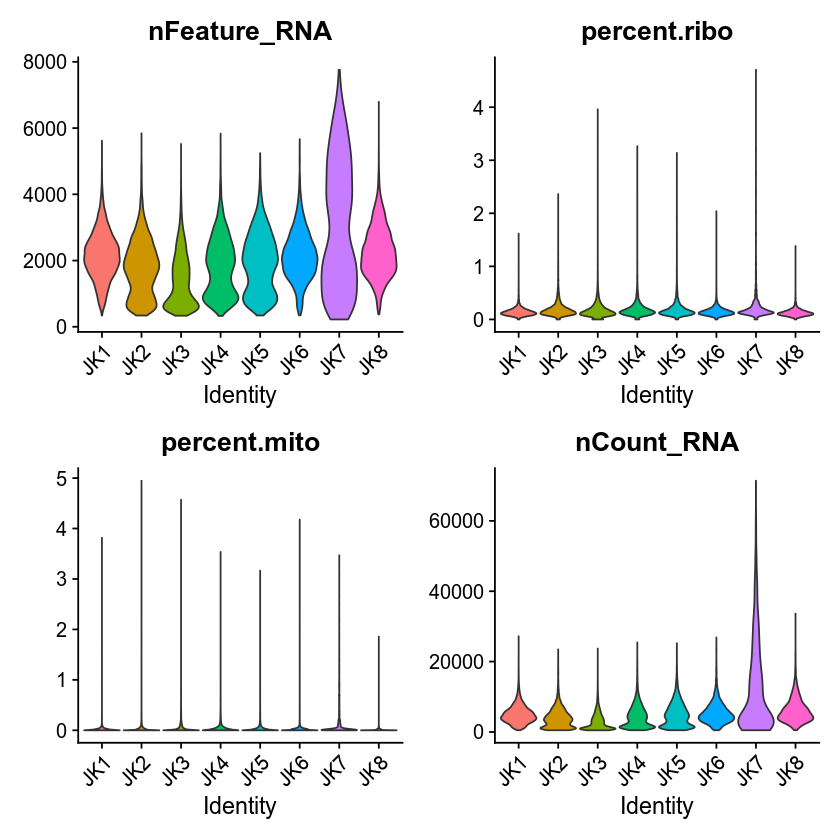

In [40]:
VlnPlot(final_cells,
        group.by = "sample",
        features = c("nFeature_RNA", "percent.ribo", "percent.mito","nCount_RNA"),         
        ncol = 2, pt.size = 0)


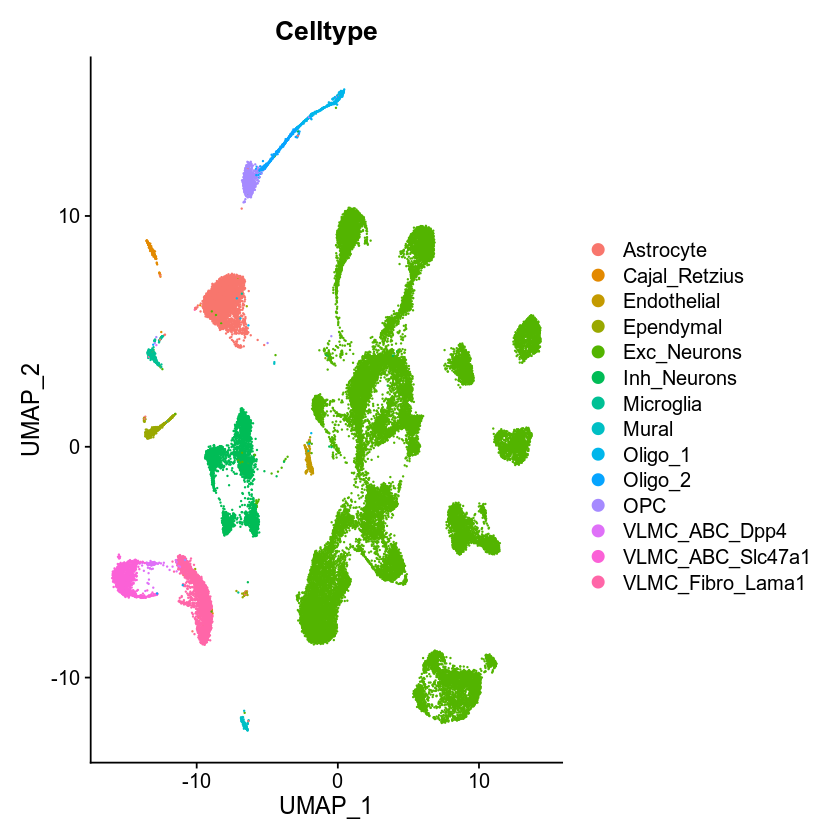

In [13]:
DimPlot(final_cells, group.by = "Celltype")

In [21]:
final_cells$Cluster_final %>% table()

.
        Astrocyte     Cajal_Retzius       Endothelial         Ependymal 
             3846               531               260               577 
          Exc_CA1       Exc_CA1_Sub           Exc_CA3            Exc_DG 
             5958              3329              3347              2267 
      Exc_EC_L2_1       Exc_EC_L2_2         Exc_EC_L3         Exc_EC_L5 
              607              1484              1116              2426 
      Exc_Fimbria         Exc_LEC_1         Exc_LEC_2      Exc_MEC_L6_1 
             4154              2579               330              2627 
     Exc_MEC_L6_2         Exc_Mossy   Inh_Adarb2_Lhx6       Inh_CGE_Cck 
             1466               271               160               514 
      Inh_CGE_Vip  Inh_Interstitial     Inh_MGE_Pvalb       Inh_MGE_Sst 
              134               791               829               810 
Inh_Neurogliaform         Microglia             Mural           Oligo_1 
              208               388              

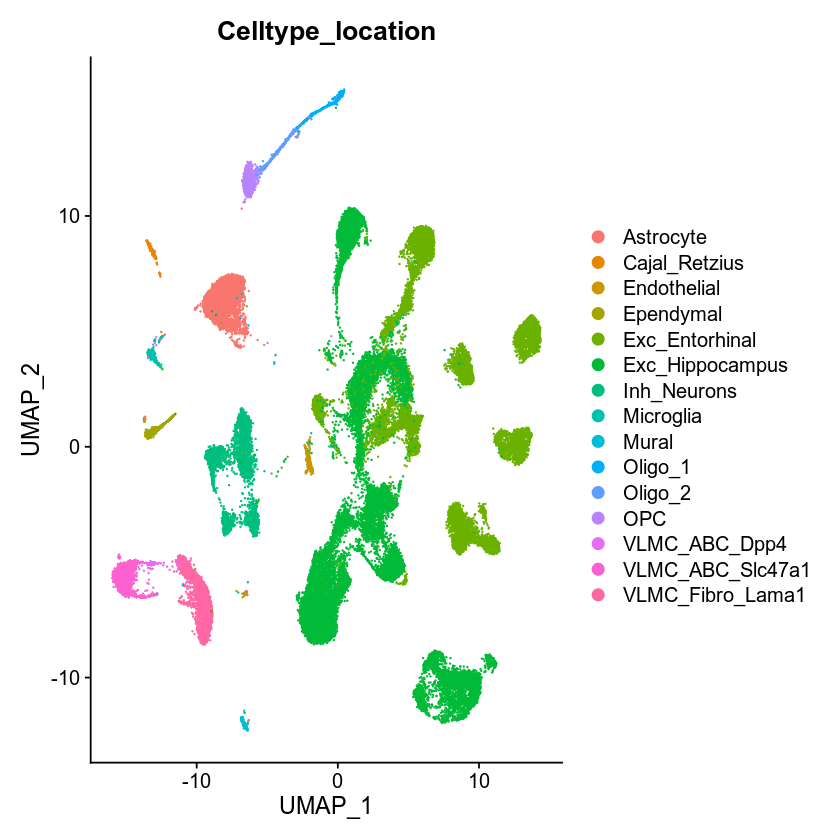

In [18]:
#collapse neurons into excitatory-hippocampal, exc-entorhinal, and inhibitory for some downstream analyses
final_cells@meta.data$Celltype_location = case_when(final_cells@meta.data$Celltype != "Exc_Neurons" ~ final_cells@meta.data$Celltype,
                                                    final_cells@meta.data$Cluster_final %in% c("Exc_CA1", 
                                                                                               "Exc_CA1_Sub",
                                                                                               "Exc_CA3",
                                                                                               "Exc_DG",
                                                                                               "Exc_Fimbria",
                                                                                               "Exc_Mossy"
                                                                                              ) ~ "Exc_Hippocampus",
                                                    T ~ "Exc_Entorhinal"
                                                   )

DimPlot(final_cells, group.by = "Celltype_location")


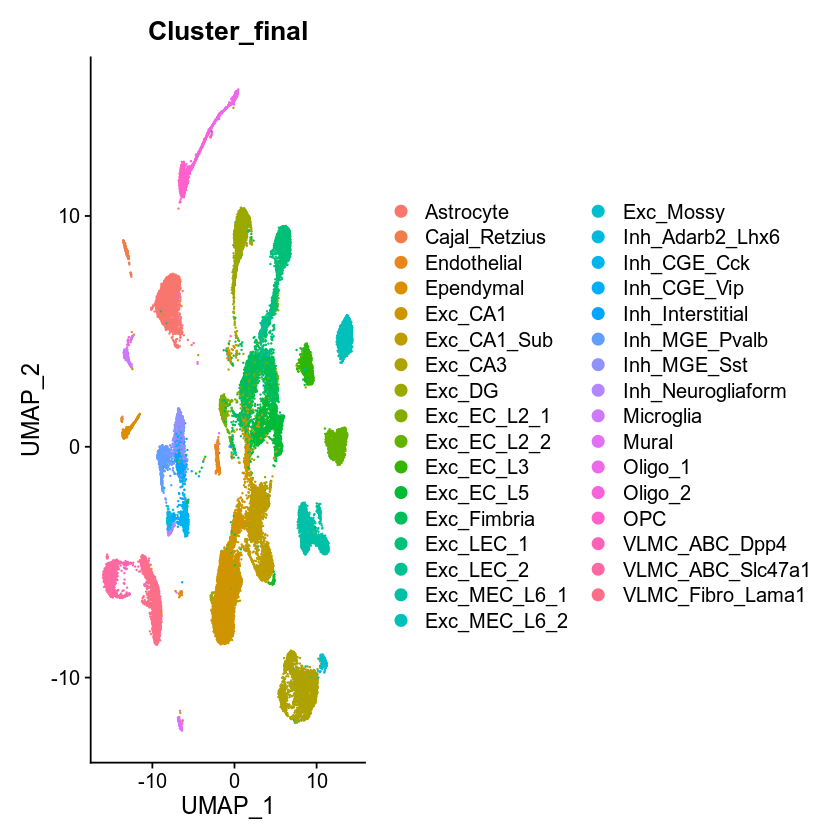

In [20]:
DimPlot(final_cells, group.by = "Cluster_final")

In [22]:
saveRDS(final_cells, "003E1_final_cells_annotated.rds")